# Importing Relevant libraries

In [13]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import scikitplot as skplt
import matplotlib.pyplot as plt

hERG, also known as human Ether-à-go-go Related Gene, refers to a specific gene that encodes a potassium ion channel in humans. This ion channel plays a crucial role in regulating the flow of potassium ions across cell membranes, particularly in the heart.

The hERG channel is essential for maintaining the normal rhythm of the heart. Mutations or abnormalities in the hERG gene can lead to a condition known as Long QT Syndrome (LQTS), which is a rare but potentially life-threatening heart disorder. LQTS can result in irregular heartbeats (arrhythmias) that can lead to fainting, seizures, or even sudden cardiac arrest.

# active_data_pubchem

In the context of drug development and pharmacology, the term "hERG active" refers to molecules that have the potential to interact with the hERG potassium ion channel in a way that could lead to cardiac arrhythmias. This is a significant concern in drug development because blocking hERG channels can prolong the QT interval in an electrocardiogram (ECG), which can lead to a potentially dangerous irregular heart rhythm known as Torsades de Pointes.

In [14]:
#hERG active data collected from PUBchem database
active_pubchem=pd.read_csv('Active_PUBCHEM_herg_diverse_ok.txt',sep='\t',header=None)
active_pubchem.rename(columns={0: 'Smile', 1: 'ID'}, inplace=True)
active_pubchem['Activity']=1
active_pubchem

,Smile,ID,Activity
0,CCCCN1C2CCC1CC(C2)OC(c1ccc(cc1)F)c1ccc(cc1)F,16759248-ACTIVE,1
1,C1CN(CCC1(c1ccc(cc1)Br)O)CCCC(=O)c1ccc(cc1)F,2448-ACTIVE,1
2,c1ccc2c(c1)C(=O)OC12C2C=C(C(=O)C=C2Oc2c1cc(c(c...,60196279-ACTIVE,1
3,c1ccc2c(c1)C(=O)OC12c2c(cc(cc2)[O-])Oc2c1ccc(c...,9885981-ACTIVE,1
4,C1CN(CCC1n1c2ccccc2[nH]c1=O)CCCC(=O)c1ccc(cc1)F,16363-ACTIVE,1
...,...,...,...
105,CN(C)CC[C@@H](c1ccc(cc1)Br)c1ccccn1,6433334-ACTIVE,1
106,CCOc1ccc(cc1)NC(=C)Nc1ccc(cc1)OCC,17756783-ACTIVE,1
107,COc1ccc(cc1)C(c1ccc(cc1)OC)C(Cl)(Cl)Cl,4115-ACTIVE,1
108,c1ccc(cc1)c1ccccc1Br,16329-ACTIVE,1


# active_data_chembl

In [15]:
#hERG active data collected from chembl
active_chembl= pd.read_csv('binders_hERG_chembl_tox21_etc_ok_diverse.txt',sep='\t',header=None)
active_chembl.rename(columns={0: 'Smile', 1: 'ID'}, inplace=True)
active_chembl['Activity']=1
active_chembl

,Smile,ID,Activity
0,Clc(cc1)cc(CCc2c3nccc2)c1C3=C1CCNCC1,binder2580-ACTIVE,1
1,[O-][N+](c(cc1)ccc1Oc(cc1)ccc1[N+]([O-])=O)=O,binder2581-ACTIVE,1
2,CCC(C)Nc(cc1)ccc1NC(C)CC,binder2582-ACTIVE,1
3,O=C(c(c(F)ccc1)c1F)NC(Nc(ccc(Oc(ccc(C(F)(F)F)c...,binder2583-ACTIVE,1
4,CC(C)(C)c1ccc(CN(C)Cc2cccc3ccccc23)cc1,binder2584-ACTIVE,1
...,...,...,...
2200,CC(c(cc1)ccc1C#N)N(CC1C(C(CCC2)C2C#N)=O)CC1N,name324-ACTIVE,1
2201,CCCOC(C(OC1CCN(C)CC1)=O)(c1ccccc1)c1ccccc1,name326-ACTIVE,1
2202,CN(C(CN(CC1)CC1O)c1ccccc1)C(Cc1ccc(CNS(C)(=O)=...,name327-ACTIVE,1
2203,OC1C(Cc2ccccc2)CCN(CCS(c(cc2)ccc2O)(=O)=O)C1,name329-ACTIVE,1


"hERG inactive" molecules are compounds that do not have a significant impact on the hERG channel, meaning they are less likely to cause QT prolongation and related cardiac issues.

# inactive_data_pubchem

In [16]:
#hERg inactive data collected from Pubchem
inactive_pubchem = pd.read_csv('non-binder_inactive_hERG_pubchem_ok_diverse.txt',sep='\t',header=None)
inactive_pubchem.rename(columns={0: 'Smile', 1: 'ID'}, inplace=True)
inactive_pubchem['Activity']=0
inactive_pubchem

,Smile,ID,Activity
0,CCCCCCOC(=O)c1cnccc1,90202-inactive-pubchem,0
1,c1cc(cnc1)CC(O)(P(=O)(O)[O-])P(=O)(O)[O-],9862176-inactive-pubchem,0
2,CC(C)(CCP(=O)(O)O)C(=O)O,11957608-inactive-pubchem,0
3,c1cc(cc(c1)[N+](=O)[O-])C(F)(F)F,7386-inactive-pubchem,0
4,C(CS(=O)(=O)[O-])CS(=O)(=O)[O-],6451143-inactive-pubchem,0
...,...,...,...
1041,Cc1c(c(no1)c1ccccc1Cl)C(=O)N[C@H]1[C@@H]2N(C1=...,23675320-inactive-pubchem,0
1042,CC1([C@@H](N2[C@H](S1)[C@@H](C2=O)NC(=O)c1c(cc...,23678596-inactive-pubchem,0
1043,CCN(CC)C(=O)Nc1cc(c(cc1)OCC(CNC(C)(C)C)O)C(=O)C,42373-inactive-pubchem,0
1044,CC1([C@@H](N2[C@H](S1)[C@@H](C2=O)NC(=O)[C@@H]...,470375-inactive-pubchem,0


# inactive_data_chembl

In [17]:
#hERG inactive data collected from Chembl database
inactive_chembl= pd.read_csv('nonbinders_inactive_chembl_tox21_etc_ok_diverse.txt',sep='\t',header=None)
inactive_chembl.rename(columns={0: 'Smile', 1: 'ID'}, inplace=True)
inactive_chembl['Activity']=0
inactive_chembl

,Smile,ID,Activity
0,COc(cc(cc1)Cl)c1Oc(ccc(Cl)c1)c1Cl,nonbinder1-inactive,0
1,Cc(cc1nc2S3)ccc1nc2SC3=O,nonbinder2-inactive,0
2,Nc(cc1)cc([N+]([O-])=O)c1NCCO,nonbinder3-inactive,0
3,C(c(cc1)cc2c1OCO2)N(CC1)CCN1c1ncccn1,nonbinder4-inactive,0
4,NS(c(cc(c(CN1C2CCCCC2)c2)C1=O)c2Cl)(=O)=O,nonbinder5-inactive,0
...,...,...,...
3584,ONC(/C=C/c1ccc(CN(CCC2)CC2c2c(-c3ccccc3)[nH]c3...,CHEMBL1094041-inactive,0
3585,CC1N(CCc(cc2cc3)ccc2nc3-c2c(C)n(C)nc2)CCC1,CHEMBL1084827-inactive,0
3586,OC(CC(C(C1)NC(c2cc(sc(Cl)c3Cl)c3[nH]2)=O)c2c1c...,CHEMBL1084762-inactive,0
3587,CC(Cc1c2[nH]c(cc3F)c1cc3F)NC2(c(cc(cc1)Cl)c1N1...,CHEMBL1082725-inactive,0


# merging_all_datasets

In [18]:
frames = [active_pubchem,inactive_pubchem,active_chembl,inactive_chembl]

data_a_ia = pd.concat(frames)

In [19]:
del data_a_ia['ID']

In [20]:
data_a_ia = data_a_ia.drop_duplicates().reset_index(drop=True)
data_a_ia

,Smile,Activity
0,CCCCN1C2CCC1CC(C2)OC(c1ccc(cc1)F)c1ccc(cc1)F,1
1,C1CN(CCC1(c1ccc(cc1)Br)O)CCCC(=O)c1ccc(cc1)F,1
2,c1ccc2c(c1)C(=O)OC12C2C=C(C(=O)C=C2Oc2c1cc(c(c...,1
3,c1ccc2c(c1)C(=O)OC12c2c(cc(cc2)[O-])Oc2c1ccc(c...,1
4,C1CN(CCC1n1c2ccccc2[nH]c1=O)CCCC(=O)c1ccc(cc1)F,1
...,...,...
6944,ONC(/C=C/c1ccc(CN(CCC2)CC2c2c(-c3ccccc3)[nH]c3...,0
6945,CC1N(CCc(cc2cc3)ccc2nc3-c2c(C)n(C)nc2)CCC1,0
6946,OC(CC(C(C1)NC(c2cc(sc(Cl)c3Cl)c3[nH]2)=O)c2c1c...,0
6947,CC(Cc1c2[nH]c(cc3F)c1cc3F)NC2(c(cc(cc1)Cl)c1N1...,0


In [9]:
#data_a_ia.drop([1948])

,Smile,Activity
0,CCCCN1C2CCC1CC(C2)OC(c1ccc(cc1)F)c1ccc(cc1)F,1
1,C1CN(CCC1(c1ccc(cc1)Br)O)CCCC(=O)c1ccc(cc1)F,1
2,c1ccc2c(c1)C(=O)OC12C2C=C(C(=O)C=C2Oc2c1cc(c(c...,1
3,c1ccc2c(c1)C(=O)OC12c2c(cc(cc2)[O-])Oc2c1ccc(c...,1
4,C1CN(CCC1n1c2ccccc2[nH]c1=O)CCCC(=O)c1ccc(cc1)F,1
...,...,...
6944,ONC(/C=C/c1ccc(CN(CCC2)CC2c2c(-c3ccccc3)[nH]c3...,0
6945,CC1N(CCc(cc2cc3)ccc2nc3-c2c(C)n(C)nc2)CCC1,0
6946,OC(CC(C(C1)NC(c2cc(sc(Cl)c3Cl)c3[nH]2)=O)c2c1c...,0
6947,CC(Cc1c2[nH]c(cc3F)c1cc3F)NC2(c(cc(cc1)Cl)c1N1...,0


In [14]:
#data_a_ia=data_a_ia.reset_index(drop=True)

In [21]:
data_a_ia = data_a_ia.sample(frac=1).reset_index(drop=True)
data_a_ia

,Smile,Activity
0,CC1=C(C(C(=C(N1)C)C(=O)OC/C=C/c1ccccc1)c1cc(cc...,0
1,CC(C)COCC(CN(Cc1ccccc1)c1ccccc1)N1CCCC1,1
2,CC(C1=NN2c(cc(cc3)F)c3OCC2C1(CCCN(C)C)c1ccccc1)=O,1
3,OC(CCN1C(CC2)(CCC2N2CCC3(COCC3)CC2)c2ccccc2)(C...,1
4,c1ccc(cc1)CCNC(=O)/C(=C/c1cc(c(cc1)O)O)/C#N,1
...,...,...
6944,CCO/N=C/c1ccc(OCCCCCN2CCN(c3ccnc(N)c3)S2(=O)=O...,1
6945,Fc1ccc(CN(C2CNCC2)C2CCOCC2)c(F)c1F,1
6946,Nc1nccn1CC(O)c1ccc(Cl)cc1F,0
6947,CC(NC(=O)C1c2ccccc2C(=O)N1CCc1ccccn1)c1ccc(OCC...,1


In [11]:
data_a_ia.Activity.value_counts()

0    4634
1    2315
Name: Activity, dtype: int64

# Saving data as .smi file for fingerprint calculation

In [22]:
data_a_ia.to_csv('data_pubchem_chembl.smi', sep='\t', index=False, header=False)


# opening fingerprint calculation output (done externaly)

In [23]:
data_pubchem_chembl=pd.read_csv('data_pubchem_chembl_out.csv',sep=',')
data_pubchem_chembl

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6944,1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6945,1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6946,1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6947,1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
data_pubchem_chembl=data_pubchem_chembl.dropna().reset_index()

In [26]:
data = data_pubchem_chembl.drop('Name', axis=1)
target = data_pubchem_chembl['Name']

In [ ]:
#Supervised models (Randomforest, XGBclassifier) 

In [27]:
def remove_low_variance(input_data, threshold):
    """ it returns the new data after filtering but without column names.
    selection.get_support gives me column names  """
    from sklearn.feature_selection import VarianceThreshold
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

def runModel(data, target, thresholdVariance, colRetainedFilename, pickleFileName, algo):

    import pickle
    import scikitplot as skplt
    import matplotlib.pyplot as plt
    from xgboost.sklearn import XGBClassifier
    from sklearn.metrics import accuracy_score
    from sklearn.model_selection import GridSearchCV
    from sklearn.metrics import classification_report
    from sklearn.model_selection import StratifiedKFold
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import train_test_split
    
    
    data_clean = remove_low_variance(data, threshold=thresholdVariance)
    
    colsRetained = pd.DataFrame.from_dict({"ColsRetained" : data_clean.columns.tolist()})
    colsRetained.to_csv(colRetainedFilename, sep=";", index=False)
    
    X_train, X_test, y_train, y_test = train_test_split(data_clean, target, test_size=0.2, random_state=42,stratify=target)
    
    if algo == "rf":
        clf=RandomForestClassifier()
        param_grid = { 
            'n_estimators': range(100,500,10),
            'max_depth' : range(1,7,1),
            'random_state': [42] ,
            'criterion':["gini"],#, "entropy"],,
            'max_features':["auto"]#, "sqrt", "log2"] 
        }
    elif algo == "xgb":
        clf = XGBClassifier()
        param_grid = { 
            'n_estimators': range(5, 31, 5),
            'max_depth' : range(1,5,1),
            'random_state': [42] ,
            'learning_rate': [0.01],
            "objective":['binary:logistic']
        }        
    
    kfold = StratifiedKFold(n_splits=3)
    CV_clf = GridSearchCV(estimator=clf, param_grid=param_grid, cv=kfold, scoring="f1", verbose=1, n_jobs=-1)
    CV_clf.fit(X_train, y_train)

    print("Best Params : ")
    print(CV_clf.best_params_)
    
    if algo == "rf":
        clf1=RandomForestClassifier(**CV_clf.best_params_)
    elif algo == "xgb":
        clf1=XGBClassifier(**CV_clf.best_params_)
    clf1.fit(X_train, y_train)

    print("Save Model : ", pickleFileName)
    with open(pickleFileName,'wb') as f:
        pickle.dump(clf1,f)
    
    y_train_class = clf1.predict(X_train)
    y_test_class = clf1.predict(X_test)
    y_train_proba = clf1.predict_proba(X_train)
    y_test_proba = clf1.predict_proba(X_test)
    
    
    skplt.plotters.plot_roc_curve(y_train, y_train_proba, title="ROC - X_train")
    plt.show()
    skplt.plotters.plot_roc_curve(y_test, y_test_proba, title="ROC - X_test")
    plt.show()
    
    print("Accuracy Train : ", str(accuracy_score(y_train, y_train_class)))
    print("Accuracy Test : ", str(accuracy_score(y_test, y_test_class)))

    skplt.metrics.plot_confusion_matrix(y_train, y_train_class, title="X_train")
    skplt.metrics.plot_confusion_matrix(y_test, y_test_class, title="X_test")

    skplt.metrics.plot_confusion_matrix(y_train, y_train_class, normalize=True,
                                       title="X_train normalized")
    skplt.metrics.plot_confusion_matrix(y_test, y_test_class, normalize=True,
                                       title="X_test normalized")

    print("Classification Report - Train :")
    print(classification_report(y_train, y_train_class))
    print("Classification Report - Test :")
    print(classification_report(y_test, y_test_class))
    
    
    

Fitting 3 folds for each of 240 candidates, totalling 720 fits
Best Params : 
{'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 110, 'random_state': 42}
Save Model :  herg_pubchem_chembl_data_pubchem_rf.pkl


/home/shivalika/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_roc_curve instead.
  warnings.warn(msg, category=FutureWarning)


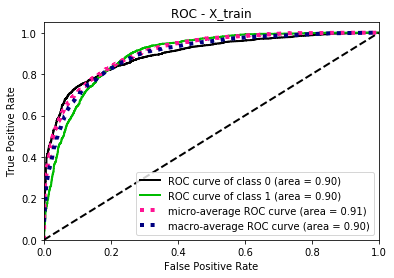

/home/shivalika/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_roc_curve instead.
  warnings.warn(msg, category=FutureWarning)


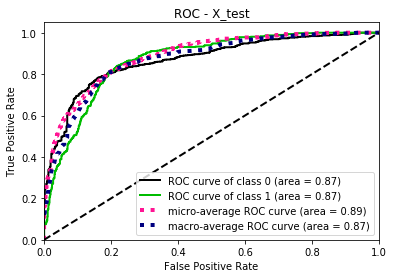

Accuracy Train :  0.8198992443324937
Accuracy Test :  0.8035971223021583
Classification Report - Train :
              precision    recall  f1-score   support

           0       0.89      0.84      0.86      3706
           1       0.71      0.78      0.74      1852

    accuracy                           0.82      5558
   macro avg       0.80      0.81      0.80      5558
weighted avg       0.83      0.82      0.82      5558

Classification Report - Test :
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       927
           1       0.67      0.79      0.73       463

    accuracy                           0.80      1390
   macro avg       0.78      0.80      0.79      1390
weighted avg       0.82      0.80      0.81      1390



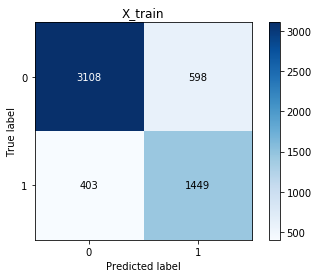

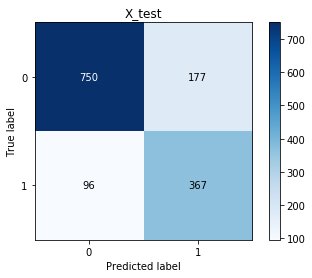

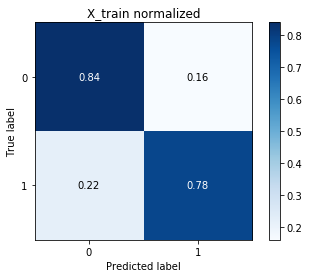

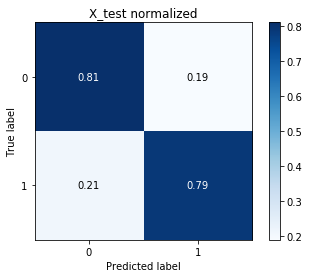

In [28]:
runModel(data, target, 0.1, 'herg_pubchem_chembl_colsRetained_rf.csv', 'herg_pubchem_chembl_data_pubchem_rf.pkl', algo="rf")    

# Y Scrambling

Y-scrambling, also known as Y-randomization or Y-shuffling, is a process used in the field of chemoinformatics and computational chemistry to create random or pseudo-random datasets for the purpose of validating quantitative structure-activity relationship (QSAR) models.

In QSAR modeling, researchers attempt to establish relationships between the chemical structure of compounds and their biological activity or other properties. Y-scrambling involves randomizing the dependent variable (Y), which represents the biological activity or property being predicted by the QSAR model, while keeping the independent variables (X), which represent the chemical structure, unchanged.

By performing Y-scrambling, researchers can create a dataset where the relationship between the chemical structure and the biological activity is lost. This randomized dataset can then be used to test the robustness and predictive power of the QSAR model. If the model performs well on the original dataset but poorly on the Y-scrambled dataset, it suggests that the model might be overfitting or otherwise not robust.

Y-scrambling is an important tool in the validation and evaluation of QSAR models, helping to ensure that the models are not simply fitting noise or chance correlations in the data. It provides a means of assessing the true predictive power of the model.

/home/shivalika/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Fitting 3 folds for each of 240 candidates, totalling 720 fits
Best Params : 
{'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 100, 'random_state': 42}
Save Model :  herg_data_pubchem_yscram_rf.pkl


/home/shivalika/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_roc_curve instead.
  warnings.warn(msg, category=FutureWarning)


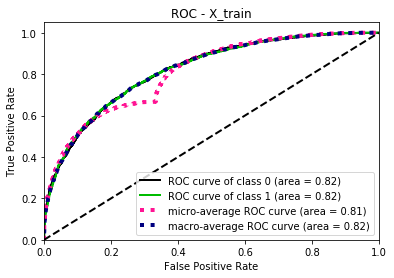

/home/shivalika/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_roc_curve instead.
  warnings.warn(msg, category=FutureWarning)


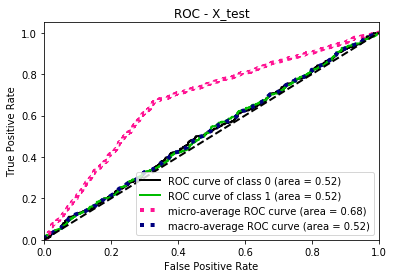

Accuracy Train :  0.6669665347247211
Accuracy Test :  0.6669064748201439
Classification Report - Train :
              precision    recall  f1-score   support

           0       0.67      1.00      0.80      3706
           1       1.00      0.00      0.00      1852

    accuracy                           0.67      5558
   macro avg       0.83      0.50      0.40      5558
weighted avg       0.78      0.67      0.53      5558

Classification Report - Test :


/home/shivalika/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shivalika/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shivalika/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shivalika/anacon

              precision    recall  f1-score   support

           0       0.67      1.00      0.80       927
           1       0.00      0.00      0.00       463

    accuracy                           0.67      1390
   macro avg       0.33      0.50      0.40      1390
weighted avg       0.44      0.67      0.53      1390

Fitting 3 folds for each of 240 candidates, totalling 720 fits
Best Params : 
{'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'n_estimators': 100, 'random_state': 42}
Save Model :  herg_data_pubchem_yscram_rf.pkl


/home/shivalika/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_roc_curve instead.
  warnings.warn(msg, category=FutureWarning)


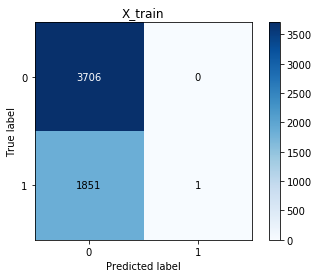

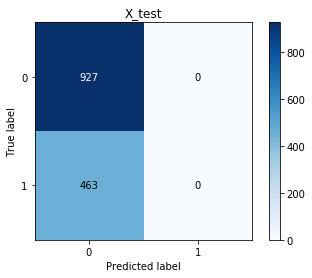

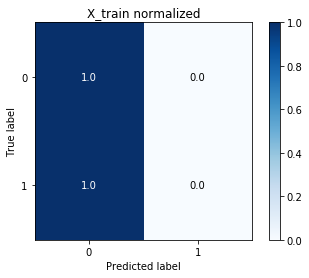

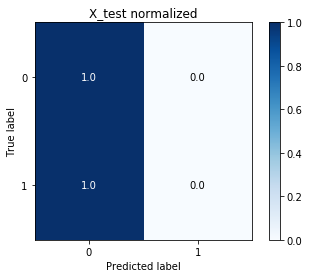

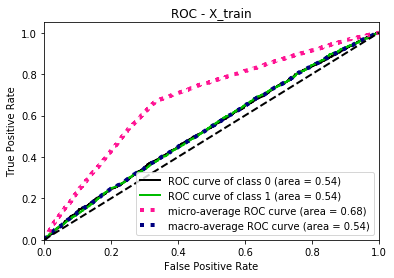

/home/shivalika/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_roc_curve instead.
  warnings.warn(msg, category=FutureWarning)


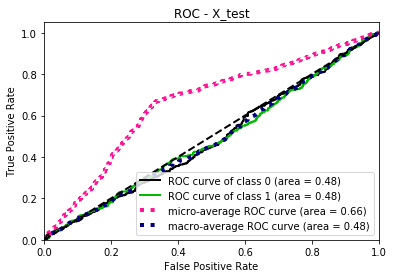

Accuracy Train :  0.6667866138898885
Accuracy Test :  0.6669064748201439
Classification Report - Train :
              precision    recall  f1-score   support

           0       0.67      1.00      0.80      3706
           1       0.00      0.00      0.00      1852

    accuracy                           0.67      5558
   macro avg       0.33      0.50      0.40      5558
weighted avg       0.44      0.67      0.53      5558

Classification Report - Test :
              precision    recall  f1-score   support

           0       0.67      1.00      0.80       927
           1       0.00      0.00      0.00       463

    accuracy                           0.67      1390
   macro avg       0.33      0.50      0.40      1390
weighted avg       0.44      0.67      0.53      1390



/home/shivalika/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shivalika/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shivalika/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shivalika/anacon

Fitting 3 folds for each of 240 candidates, totalling 720 fits
Best Params : 
{'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'n_estimators': 100, 'random_state': 42}
Save Model :  herg_data_pubchem_yscram_rf.pkl


/home/shivalika/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_roc_curve instead.
  warnings.warn(msg, category=FutureWarning)


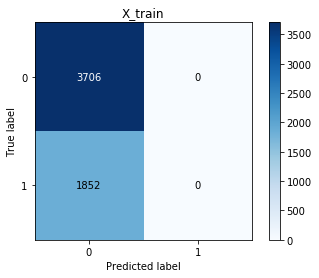

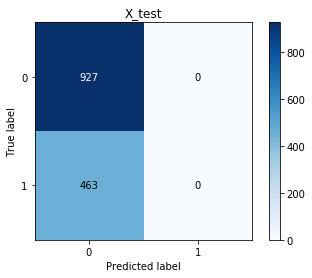

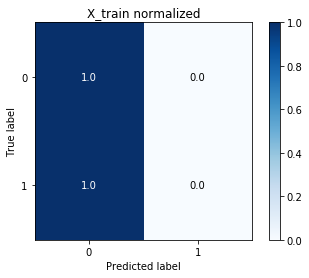

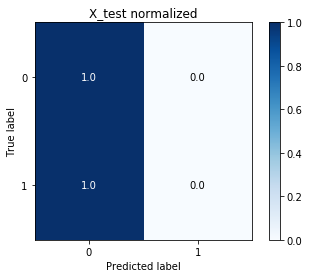

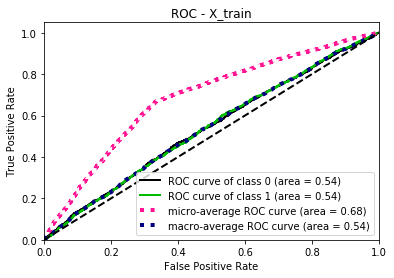

/home/shivalika/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_roc_curve instead.
  warnings.warn(msg, category=FutureWarning)


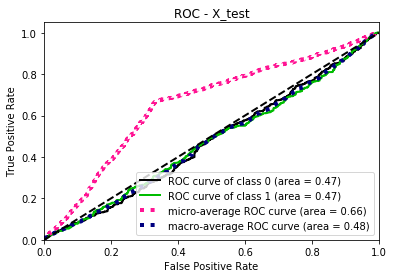

Accuracy Train :  0.6667866138898885
Accuracy Test :  0.6669064748201439
Classification Report - Train :
              precision    recall  f1-score   support

           0       0.67      1.00      0.80      3706
           1       0.00      0.00      0.00      1852

    accuracy                           0.67      5558
   macro avg       0.33      0.50      0.40      5558
weighted avg       0.44      0.67      0.53      5558

Classification Report - Test :
              precision    recall  f1-score   support

           0       0.67      1.00      0.80       927
           1       0.00      0.00      0.00       463

    accuracy                           0.67      1390
   macro avg       0.33      0.50      0.40      1390
weighted avg       0.44      0.67      0.53      1390



/home/shivalika/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shivalika/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shivalika/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shivalika/anacon

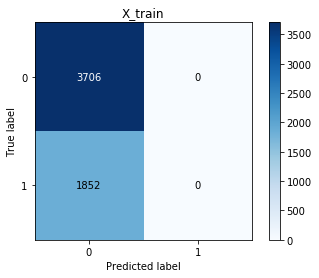

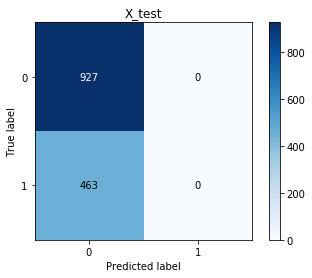

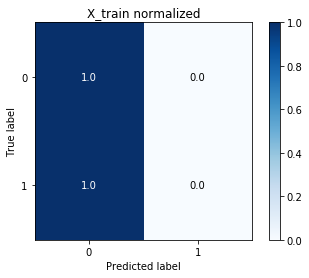

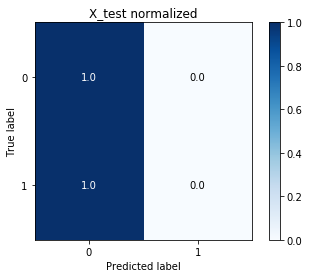

In [29]:
for _ in range(3):
    np.random.shuffle(target)
    runModel(data, target, 0.1, 'herg_pubchem_yscram_colsRetained_rf.csv', 'herg_data_pubchem_yscram_rf.pkl', algo="rf")    